In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 25)
pd.set_option('display.width', 1000)

In [3]:
df= pd.read_csv('DATA_ISCX/iscxIDS2012.csv')
df.head(10)

/Users/nishantjadhav/Documents/Softwares/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Tag,appName,destination,destinationPayloadAsBase64,destinationPayloadAsUTF,destinationPort,destinationTCPFlagsDescription,direction,protocolName,sensorInterfaceId,source,sourceFile,sourcePayloadAsBase64,sourcePayloadAsUTF,sourcePort,sourceTCPFlagsDescription,startDateTime,startTime,stopDateTime,totalDestinationBytes,totalDestinationPackets,totalSourceBytes,totalSourcePackets
0,Normal,Unknown_UDP,224.0.0.251,NaN,NaN,5353.0,NaN,L2R,udp_ip,NaN,192.168.5.122,TestbedMonJun14Flows.xml,NaN,NaN,5353.0,NaN,2010-06-13T23:57:19,NaN,2010-06-14T00:11:23,0,0,16076,178
1,Normal,HTTPImageTransfer,206.217.198.186,NaN,NaN,80.0,NaN,L2R,tcp_ip,NaN,192.168.2.111,TestbedMonJun14Flows.xml,NaN,NaN,4435.0,"F,A",2010-06-13T23:58:23,NaN,2010-06-14T00:01:24,0,0,384,6
2,Normal,DNS,192.168.5.122,NaN,NaN,53.0,NaN,L2L,udp_ip,NaN,192.168.4.119,TestbedMonJun14Flows.xml,NaN,NaN,4428.0,NaN,2010-06-13T23:58:31,NaN,2010-06-13T23:59:25,642,4,171,2
3,Normal,HTTPImageTransfer,219.94.203.105,NaN,NaN,80.0,NaN,L2R,tcp_ip,NaN,192.168.4.119,TestbedMonJun14Flows.xml,NaN,NaN,3639.0,"F,A",2010-06-13T23:58:31,NaN,2010-06-14T00:00:58,0,0,384,6
4,Normal,HTTPImageTransfer,98.137.80.50,NaN,NaN,80.0,R,L2R,tcp_ip,NaN,192.168.4.119,TestbedMonJun14Flows.xml,NaN,NaN,3641.0,"F,P,A",2010-06-13T23:58:31,NaN,2010-06-13T23:59:26,128,2,186,2
5,Normal,HTTPImageTransfer,142.166.14.86,NaN,NaN,80.0,"F,P,A",L2R,tcp_ip,NaN,192.168.4.119,TestbedMonJun14Flows.xml,NaN,NaN,3642.0,"F,P,A",2010-06-13T23:58:32,NaN,2010-06-14T00:01:07,1476,2,331,4
6,Normal,HTTPWeb,59.106.19.74,NaN,NaN,80.0,NaN,L2R,tcp_ip,NaN,192.168.2.109,TestbedMonJun14Flows.xml,NaN,NaN,1523.0,R,2010-06-13T23:58:32,NaN,2010-06-13T23:59:58,0,0,64,1
7,Normal,SecureWeb,209.87.178.183,NaN,NaN,443.0,"F,A",L2R,tcp_ip,NaN,192.168.4.121,TestbedMonJun14Flows.xml,NaN,NaN,52031.0,"F,A",2010-06-13T23:58:35,NaN,2010-06-14T00:00:15,128,2,128,2
8,Normal,HTTPWeb,208.89.13.133,NaN,NaN,80.0,"F,A",L2R,tcp_ip,NaN,192.168.4.121,TestbedMonJun14Flows.xml,NaN,NaN,52032.0,"F,A",2010-06-13T23:58:36,NaN,2010-06-14T00:00:16,128,2,128,2
9,Normal,Unknown_UDP,0.0.0.0,NaN,NaN,547.0,NaN,R2R,udp_ip,NaN,0.0.0.0,TestbedMonJun14Flows.xml,NaN,NaN,546.0,NaN,2010-06-13T23:58:51,NaN,2010-06-13T23:59:54,465,3,0,0


In [ ]:
df.destinationPayloadAsUTF

In [22]:
df.appName.value_counts().sort_values(ascending=False)

HTTPWeb              721503
HTTPImageTransfer    707631
DNS                  309359
Unknown_UDP           62669
SecureWeb             56456
                      ...  
GuptaSQLBase              4
MGCP                      3
Blubster                  1
UpdateDaemon              1
SIP                       1
Name: appName, Length: 107, dtype: int64

In [23]:
df.direction.value_counts()

L2R                           1745961
L2L                            262509
R2L                             18040
R2R                              1543
TestbedThuJun17-1Flows.xml          1
Name: direction, dtype: int64

In [15]:
df.columns

Index(['Tag', 'appName', 'destination', 'destinationPayloadAsBase64', 'destinationPayloadAsUTF', 'destinationPort', 'destinationTCPFlagsDescription', 'direction', 'protocolName', 'sensorInterfaceId', 'source', 'sourceFile', 'sourcePayloadAsBase64', 'sourcePayloadAsUTF', 'sourcePort', 'sourceTCPFlagsDescription', 'startDateTime', 'startTime', 'stopDateTime', 'totalDestinationBytes', 'totalDestinationPackets', 'totalSourceBytes', 'totalSourcePackets', 'payLen'], dtype='object')

In [4]:
df.isnull().sum()/len(df)*100

Tag                                0.000049
appName                            0.000000
destination                        0.000049
destinationPayloadAsBase64        57.414201
destinationPayloadAsUTF           57.416962
destinationPort                    0.000049
destinationTCPFlagsDescription    24.024804
direction                          0.000000
protocolName                       0.000049
sensorInterfaceId                 90.530775
source                             0.000049
sourceFile                         0.000049
sourcePayloadAsBase64             52.967623
sourcePayloadAsUTF                57.149169
sourcePort                         0.000049
sourceTCPFlagsDescription         20.982577
startDateTime                      0.000049
startTime                         90.978149
stopDateTime                       0.000049
totalDestinationBytes              0.000000
totalDestinationPackets            0.000000
totalSourceBytes                   0.000000
totalSourcePackets              

In [5]:
for x in df[df.destinationPayloadAsBase64.isnull()].Tag.value_counts():
    print(x/len(df)*100)

55.89639131896882
1.5178096835685835


In [6]:
df['Tag'] = df['Tag'].apply(lambda tag: 1 if tag =="Attack" else 0)
df.head(2)

,Tag,appName,destination,destinationPayloadAsBase64,destinationPayloadAsUTF,destinationPort,destinationTCPFlagsDescription,direction,protocolName,sensorInterfaceId,source,sourceFile,sourcePayloadAsBase64,sourcePayloadAsUTF,sourcePort,sourceTCPFlagsDescription,startDateTime,startTime,stopDateTime,totalDestinationBytes,totalDestinationPackets,totalSourceBytes,totalSourcePackets
0,0,Unknown_UDP,224.0.0.251,NaN,NaN,5353.0,NaN,L2R,udp_ip,NaN,192.168.5.122,TestbedMonJun14Flows.xml,NaN,NaN,5353.0,NaN,2010-06-13T23:57:19,NaN,2010-06-14T00:11:23,0,0,16076,178
1,0,HTTPImageTransfer,206.217.198.186,NaN,NaN,80.0,NaN,L2R,tcp_ip,NaN,192.168.2.111,TestbedMonJun14Flows.xml,NaN,NaN,4435.0,"F,A",2010-06-13T23:58:23,NaN,2010-06-14T00:01:24,0,0,384,6


In [7]:
df['payLen'] = df['destinationPayloadAsUTF'].apply(lambda x : len(x) if pd.notnull(x) else x)

In [24]:
df.head()

,Tag,appName,destination,destinationPayloadAsBase64,destinationPayloadAsUTF,destinationPort,destinationTCPFlagsDescription,direction,protocolName,sensorInterfaceId,source,sourceFile,sourcePayloadAsBase64,sourcePayloadAsUTF,sourcePort,sourceTCPFlagsDescription,startDateTime,startTime,stopDateTime,totalDestinationBytes,totalDestinationPackets,totalSourceBytes,totalSourcePackets,payLen
0,0,Unknown_UDP,224.0.0.251,NaN,NaN,5353.0,NaN,L2R,udp_ip,NaN,192.168.5.122,TestbedMonJun14Flows.xml,NaN,NaN,5353.0,NaN,2010-06-13T23:57:19,NaN,2010-06-14T00:11:23,0,0,16076,178,NaN
1,0,HTTPImageTransfer,206.217.198.186,NaN,NaN,80.0,NaN,L2R,tcp_ip,NaN,192.168.2.111,TestbedMonJun14Flows.xml,NaN,NaN,4435.0,"F,A",2010-06-13T23:58:23,NaN,2010-06-14T00:01:24,0,0,384,6,NaN
2,0,DNS,192.168.5.122,NaN,NaN,53.0,NaN,L2L,udp_ip,NaN,192.168.4.119,TestbedMonJun14Flows.xml,NaN,NaN,4428.0,NaN,2010-06-13T23:58:31,NaN,2010-06-13T23:59:25,642,4,171,2,NaN
3,0,HTTPImageTransfer,219.94.203.105,NaN,NaN,80.0,NaN,L2R,tcp_ip,NaN,192.168.4.119,TestbedMonJun14Flows.xml,NaN,NaN,3639.0,"F,A",2010-06-13T23:58:31,NaN,2010-06-14T00:00:58,0,0,384,6,NaN
4,0,HTTPImageTransfer,98.137.80.50,NaN,NaN,80.0,R,L2R,tcp_ip,NaN,192.168.4.119,TestbedMonJun14Flows.xml,NaN,NaN,3641.0,"F,P,A",2010-06-13T23:58:31,NaN,2010-06-13T23:59:26,128,2,186,2,NaN


In [25]:
df[df.payLen.notnull()]

,Tag,appName,destination,destinationPayloadAsBase64,destinationPayloadAsUTF,destinationPort,destinationTCPFlagsDescription,direction,protocolName,sensorInterfaceId,source,sourceFile,sourcePayloadAsBase64,sourcePayloadAsUTF,sourcePort,sourceTCPFlagsDescription,startDateTime,startTime,stopDateTime,totalDestinationBytes,totalDestinationPackets,totalSourceBytes,totalSourcePackets,payLen
20,0,POP,192.168.5.122,K09LIERvdmVjb3QgcmVhZHkuDQorT0sgRG92ZWNvdCByZW...,+OK Dovecot ready.+OK Dovecot ready.+OK+OK+OK ...,110.0,"F,S,P,A",L2L,tcp_ip,NaN,192.168.2.112,TestbedMonJun14Flows.xml,VVNFUiB1c2VyMTINClBBU1MgbnNsdXNlcjEyDQpTVEFUDQ...,NaN,3869.0,"F,S,P,A",2010-06-13T23:59:11,NaN,2010-06-13T23:59:11,1106,16,531,8,56.0
24,0,DNS,192.168.5.122,FvOBgAABAAEAAgAAA3d3dwhjbGFpcnZveQJqcAAAAQABwA...,........www.clairvoy.jp.......X.........H*..un...,53.0,NaN,L2L,udp_ip,NaN,192.168.4.119,TestbedMonJun14Flows.xml,FvMBAAABAAAAAAAAA3d3dwhjbGFpcnZveQJqcAAAAQABFv...,NaN,2971.0,NaN,2010-06-13T23:59:15,NaN,2010-06-13T23:59:25,2180,8,315,4,92.0
25,0,DNS,198.164.30.2,rFiBkAABAAEAAgACAnN2Bm1hZGFtZQJqcAAAAQABwAwAAQ...,.X.......sv.madame.jp..........=y.@....I...dns...,53.0,NaN,L2R,udp_ip,NaN,192.168.5.122,TestbedMonJun14Flows.xml,rFgBEAABAAAAAAABAnN2Bm1hZGFtZQJqcAAAAQABAAApEA...,NaN,3774.0,NaN,2010-06-13T23:59:15,NaN,2010-06-13T23:59:16,1326,9,808,9,409.0
26,0,HTTPWeb,65.181.169.155,SFRUUC8xLjEgMjAwIE9LDQpEYXRlOiBNb24sIDE0IEp1bi...,"HTTP/1.1 200 OKDate: Mon, 14 Jun 2010 02:59:58...",80.0,"F,S,R,P,A",L2R,tcp_ip,NaN,192.168.4.119,TestbedMonJun14Flows.xml,R0VUIC9mYXFzL3Byb3RlY3QuaHRtbCBIVFRQLzEuMQ0KSG...,NaN,3645.0,"F,S,P,A",2010-06-13T23:59:15,NaN,2010-06-13T23:59:51,10490,11,833,11,60.0
27,0,HTTPWeb,74.117.115.80,SFRUUC8xLjEgMzAyIEZvdW5kDQpEYXRlOiBNb24sIDE0IE...,"HTTP/1.1 302 FoundDate: Mon, 14 Jun 2010 02:59...",80.0,"F,S,P,A",L2R,tcp_ip,NaN,192.168.4.119,TestbedMonJun14Flows.xml,R0VUIC8gSFRUUC8xLjENCkhvc3Q6IHd3dy5pbnRlcm5ldC...,NaN,3644.0,"F,S,P,A",2010-06-13T23:59:15,NaN,2010-06-13T23:59:16,810,5,387,5,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2028046,0,HTTPImageTransfer,142.166.14.77,SFRUUC8xLjEgMjAwIE9LDQpMYXN0LU1vZGlmaWVkOiBUaH...,"HTTP/1.1 200 OKLast-Modified: Thu, 15 Nov 2007...",80.0,"S,A",L2R,tcp_ip,NaN,192.168.4.120,TestbedTueJun15-2Flows.xml,R0VUIC9maW5hbGN1dGV4cHJlc3MvaW1hZ2VzL2ltcG9ydG...,GET /finalcutexpress/images/importing_camera20...,4122.0,"S,R,P,A",2010-06-15T14:58:59,NaN,2010-06-15T14:58:59,6202,6,537,7,982.0
2028047,0,HTTPWeb,208.69.183.171,SFRUUC8xLjEgMjAwIE9LDQpEYXRlOiBUdWUsIDE1IEp1bi...,"HTTP/1.1 200 OKDate: Tue, 15 Jun 2010 17:59:41...",80.0,"S,A",L2R,tcp_ip,NaN,192.168.4.120,TestbedTueJun15-2Flows.xml,R0VUIC9pbmRleC5odG1sIEhUVFAvMS4xDQpIb3N0OiBwdW...,GET /index.html HTTP/1.1Host: punkpages.comGET...,4121.0,"S,P,A",2010-06-15T14:58:59,NaN,2010-06-15T14:58:59,66,1,237,3,997.0
2028048,0,HTTPWeb,82.98.86.183,SFRUUC8xLjAgMjAwIE9LDQpEYXRlOiBUdWUsIDE1IEp1bi...,"HTTP/1.0 200 OKDate: Tue, 15 Jun 2010 17:59:41...",80.0,"S,A",L2R,tcp_ip,NaN,192.168.3.114,TestbedTueJun15-2Flows.xml,R0VUIC91ay9zZXJ2aWNlcy9wYXJ0bmVyLXByb2dyYW1tZS...,GET /uk/services/partner-programme/?tracked=&p...,1183.0,"S,P,A",2010-06-15T14:58:59,NaN,2010-06-15T14:58:59,3164,4,375,4,991.0
2028050,0,HTTPWeb,206.80.1.34,SFRUUC8xLjEgMjAwIE9LDQpEYXRlOiBUdWUsIDE1IEp1bi...,"HTTP/1.1 200 OKDate: Tue, 15 Jun 2010 17:59:42...",80.0,"S,P,A",L2R,tcp_ip,NaN,192.168.4.121,TestbedTueJun15-2Flows.xml,R0VUIC9ndWlkZWxpbmVzL3Rlcm1zLyBIVFRQLzEuMQ0KSG...,GET /guidelines/terms/ HTTP/1.1Host: sponsored...,50280.0,"S,P,A",2010-06-15T14:58:59,NaN,2010-06-15T14:58:59,2294,4,320,4,994.0


<AxesSubplot:xlabel='Tag', ylabel='payLen'>

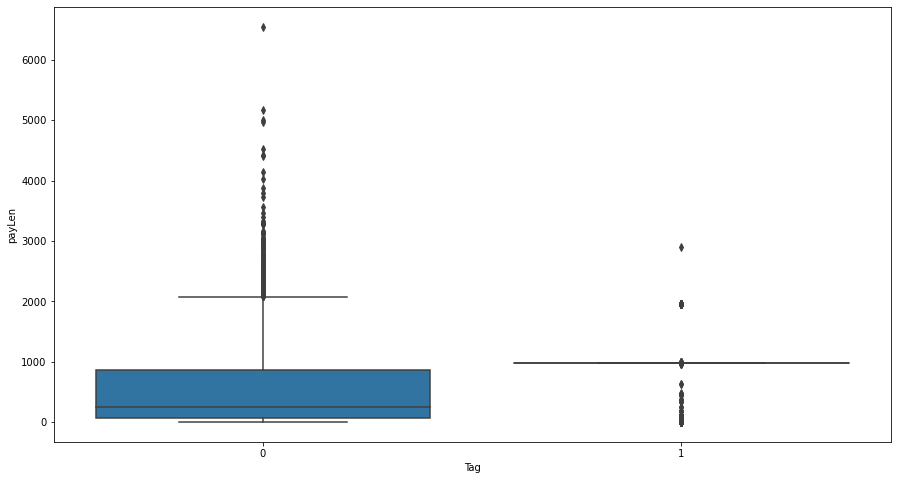

In [8]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Tag',y='payLen',data=df)

In [14]:
df[df.Tag==1]['payLen'].describe()

count    38083.000000
mean       957.847202
std        148.218789
min          1.000000
25%        980.000000
50%        980.000000
75%        980.000000
max       2892.000000
Name: payLen, dtype: float64